# Baltimore Victim Based Crime Data

Do the necessaries imports:

In [149]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

from datetime import datetime

In [150]:
from os import makedirs
from os.path import exists, isfile, getsize

# import urllib.request as urllib       # Python 2.7
from urllib.request import urlretrieve  # Python 3

If the temporary directory doesn't exist, so make it:

In [151]:
files_data_directory = "files/data/"

if not exists(files_data_directory):
    makedirs(files_data_directory)

# First of all: download the CSV and read it in a variable

Download the CSV data from https://data.baltimorecity.gov/Public-Safety/BPD-Part-1-Victim-Based-Crime-Data/wsfq-mvij

In [152]:
based_crime_data_csv = files_data_directory + "Based_Crime_Data.csv"

In [154]:
vendors = "https://data.baltimorecity.gov/api/views/wsfq-mvij/rows.csv?accessType=DOWNLOAD"

# download the file
# urlretrieve(vendors, based_crime_data_csv)

if isfile(based_crime_data_csv):
    tam = getsize(based_crime_data_csv)
    print("File downloaded, ", tam, " bytes.")
else:
    print("Error downloading file!")

File downloaded,  40538138  bytes.


Read the CSV keeping the same header and change the Location.1 column to location from df_crimes:

In [155]:
df_crimes = pd.read_csv(based_crime_data_csv)

df_crimes = df_crimes.rename(columns={"Location 1": "Location"})

df_crimes.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location,Premise,Total Incidents
0,08/05/2017,23:00:00,6D,PARK DR & LIBERTY HEIGHTS AV,LARCENY FROM AUTO,O,NaN,611.0,NORTHWESTERN,Burleith-Leighton,-76.66388,39.32183,"(39.3218300000, -76.6638800000)",STREET,1
1,08/05/2017,23:00:00,4E,2100 WESTWOOD AVE,COMMON ASSAULT,O,HANDS,741.0,WESTERN,Easterwood,-76.65191,39.30862,"(39.3086200000, -76.6519100000)",STREET,1
2,08/05/2017,21:57:00,1F,1600 GERTRUDE ST,HOMICIDE,Outside,FIREARM,813.0,SOUTHWESTERN,Northwest Community Actio,-76.66456,39.30605,"(39.3060500000, -76.6645600000)",Street,1
3,08/05/2017,21:00:00,4E,1300 PENNSYLVANIA AVE,COMMON ASSAULT,I,HANDS,123.0,CENTRAL,Upton,-76.63080,39.30039,"(39.3003900000, -76.6308000000)",APT/CONDO,1
4,08/05/2017,20:44:00,6C,3600 W CATON AVE,LARCENY,I,NaN,843.0,SOUTHWESTERN,Allendale,-76.67669,39.28833,"(39.2883300000, -76.6766900000)",GROCERY/CO,1


Describe the dataframe:

In [156]:
df_crimes.describe()

,Post,Longitude,Latitude,Total Incidents
count,272025.000000,270081.000000,270081.000000,272252.0
mean,506.183288,-76.617435,39.307419,1.0
std,260.701478,0.042297,0.029545,0.0
min,2.000000,-76.711620,39.200410,1.0
25%,243.000000,-76.648430,39.288350,1.0
50%,511.000000,-76.613970,39.303660,1.0
75%,731.000000,-76.587450,39.327810,1.0
max,945.000000,-76.528500,39.372930,1.0


Information about the dataframe:

In [157]:
df_crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272252 entries, 0 to 272251
Data columns (total 15 columns):
CrimeDate          272252 non-null object
CrimeTime          272252 non-null object
CrimeCode          272252 non-null object
Location           270078 non-null object
Description        272252 non-null object
Inside/Outside     262667 non-null object
Weapon             93951 non-null object
Post               272025 non-null float64
District           272170 non-null object
Neighborhood       269553 non-null object
Longitude          270081 non-null float64
Latitude           270081 non-null float64
Location           270081 non-null object
Premise            262189 non-null object
Total Incidents    272252 non-null int64
dtypes: float64(3), int64(1), object(11)
memory usage: 31.2+ MB


Do a copy of dataframe with the first records:

In [159]:
df_crimes_cp = df_crimes.copy()

Create a new column called CrimeDateTime with the date in datetime:

In [160]:
df_crimes_cp['CrimeDateTime'] = pd.to_datetime(df_crimes_cp['CrimeDate'])

df_crimes_cp.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location,Premise,Total Incidents,CrimeDateTime
0,08/05/2017,23:00:00,6D,PARK DR & LIBERTY HEIGHTS AV,LARCENY FROM AUTO,O,NaN,611.0,NORTHWESTERN,Burleith-Leighton,-76.66388,39.32183,"(39.3218300000, -76.6638800000)",STREET,1,2017-08-05
1,08/05/2017,23:00:00,4E,2100 WESTWOOD AVE,COMMON ASSAULT,O,HANDS,741.0,WESTERN,Easterwood,-76.65191,39.30862,"(39.3086200000, -76.6519100000)",STREET,1,2017-08-05
2,08/05/2017,21:57:00,1F,1600 GERTRUDE ST,HOMICIDE,Outside,FIREARM,813.0,SOUTHWESTERN,Northwest Community Actio,-76.66456,39.30605,"(39.3060500000, -76.6645600000)",Street,1,2017-08-05
3,08/05/2017,21:00:00,4E,1300 PENNSYLVANIA AVE,COMMON ASSAULT,I,HANDS,123.0,CENTRAL,Upton,-76.63080,39.30039,"(39.3003900000, -76.6308000000)",APT/CONDO,1,2017-08-05
4,08/05/2017,20:44:00,6C,3600 W CATON AVE,LARCENY,I,NaN,843.0,SOUTHWESTERN,Allendale,-76.67669,39.28833,"(39.2883300000, -76.6766900000)",GROCERY/CO,1,2017-08-05


The column CrimeDateTime is in the end, so... we will reorder the columns:

In [161]:
# get the list of columns
cols = df_crimes_cp.columns.tolist()
# put the last column as first column
cols = cols[-1:] + cols[:-1]
# reorder the columns
df_crimes_cp = df_crimes_cp[cols]

df_crimes_cp.head()

,CrimeDateTime,CrimeDate,CrimeTime,CrimeCode,Location,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location,Location,Premise,Total Incidents
0,2017-08-05,08/05/2017,23:00:00,6D,PARK DR & LIBERTY HEIGHTS AV,"(39.3218300000, -76.6638800000)",LARCENY FROM AUTO,O,NaN,611.0,NORTHWESTERN,Burleith-Leighton,-76.66388,39.32183,PARK DR & LIBERTY HEIGHTS AV,"(39.3218300000, -76.6638800000)",STREET,1
1,2017-08-05,08/05/2017,23:00:00,4E,2100 WESTWOOD AVE,"(39.3086200000, -76.6519100000)",COMMON ASSAULT,O,HANDS,741.0,WESTERN,Easterwood,-76.65191,39.30862,2100 WESTWOOD AVE,"(39.3086200000, -76.6519100000)",STREET,1
2,2017-08-05,08/05/2017,21:57:00,1F,1600 GERTRUDE ST,"(39.3060500000, -76.6645600000)",HOMICIDE,Outside,FIREARM,813.0,SOUTHWESTERN,Northwest Community Actio,-76.66456,39.30605,1600 GERTRUDE ST,"(39.3060500000, -76.6645600000)",Street,1
3,2017-08-05,08/05/2017,21:00:00,4E,1300 PENNSYLVANIA AVE,"(39.3003900000, -76.6308000000)",COMMON ASSAULT,I,HANDS,123.0,CENTRAL,Upton,-76.63080,39.30039,1300 PENNSYLVANIA AVE,"(39.3003900000, -76.6308000000)",APT/CONDO,1
4,2017-08-05,08/05/2017,20:44:00,6C,3600 W CATON AVE,"(39.2883300000, -76.6766900000)",LARCENY,I,NaN,843.0,SOUTHWESTERN,Allendale,-76.67669,39.28833,3600 W CATON AVE,"(39.2883300000, -76.6766900000)",GROCERY/CO,1


Get all crimes on the following date:

In [162]:
date = datetime(2017, 8, 5)

df_crimes_in_date = df_crimes_cp[df_crimes_cp.CrimeDateTime == date]

df_crimes_in_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83 entries, 0 to 83
Data columns (total 18 columns):
CrimeDateTime      83 non-null datetime64[ns]
CrimeDate          83 non-null object
CrimeTime          83 non-null object
CrimeCode          83 non-null object
Location           83 non-null object
Location           83 non-null object
Description        83 non-null object
Inside/Outside     75 non-null object
Weapon             41 non-null object
Post               83 non-null float64
District           83 non-null object
Neighborhood       83 non-null object
Longitude          83 non-null float64
Latitude           83 non-null float64
Location           83 non-null object
Location           83 non-null object
Premise            75 non-null object
Total Incidents    83 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(1), object(13)
memory usage: 12.3+ KB


Get the x (Longitude) and y (Latitude) values:

In [163]:
x = list(df_crimes_in_date["Longitude"])
y = list(df_crimes_in_date["Latitude"])

Plot a part of the dataframe:

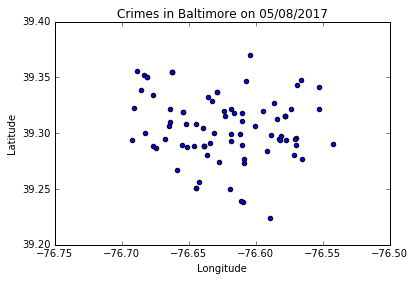

In [166]:
plt.title('Crimes in Baltimore on ' + str(date.date().strftime("%d/%m/%Y")))

plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.scatter(x, y)